## Bordes

#### Detección de bordes

In [3]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time

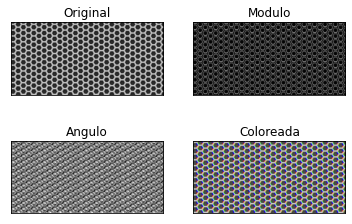

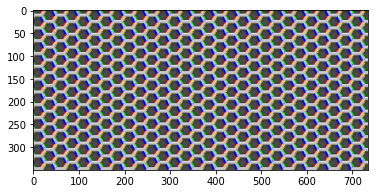

In [5]:
img = cv.imread('metalgrid.jpg',0)

#grises=True
grises=True
if grises:
    # En escala de grises
    #laplacian = cv.Laplacian(img,cv.CV_64F)
    sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
else:
    # En blanco y negro
    #laplacian = cv.Laplacian(img,cv.CV_8U)
    sobelx = cv.Sobel(img,cv.CV_8U,1,0,ksize=3)
    sobely = cv.Sobel(img,cv.CV_8U,0,1,ksize=3)

mag = np.hypot(sobelx, sobely)
#mag = mag/mag.max()*255
#mag = np.uint8(mag)
    
    
    
ax1=plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
ax2=plt.subplot(2,2,2),plt.imshow(mag,cmap = 'gray')
plt.title('Modulo'), plt.xticks([]), plt.yticks([])

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely, sobelx)
angle = np.rad2deg(theta)

ax3=plt.subplot(2,2,3),plt.imshow(angle,cmap = 'gray')
plt.title('Angulo'), plt.xticks([]), plt.yticks([])

imgColor = cv.imread('metalgrid.jpg')

for x in range(angle[:,0].size):
    for y in range(angle[0,:].size):
        if(mag[x,y]>=100):
            if(angle[x,y]>27 and angle[x,y]<47):
                imgColor[x,y,0]=255
                imgColor[x,y,1]=0
                imgColor[x,y,2]=0
            if(angle[x,y]>-47 and angle[x,y]<27):
                imgColor[x,y,0]=0
                imgColor[x,y,1]=0
                imgColor[x,y,2]=255
            if(angle[x,y]>134 and angle[x,y]<154):
                imgColor[x,y,0]=0
                imgColor[x,y,1]=255
                imgColor[x,y,2]=0
            if(angle[x,y]>-154 and angle[x,y]<-134):
                imgColor[x,y,0]=255
                imgColor[x,y,1]=255
                imgColor[x,y,2]=0
     
ax4=plt.subplot(2,2,4),plt.imshow(imgColor,cmap = 'gray')
plt.title('Coloreada'), plt.xticks([]), plt.yticks([])
plt.show()

plt.show()


plt.imshow(imgColor)


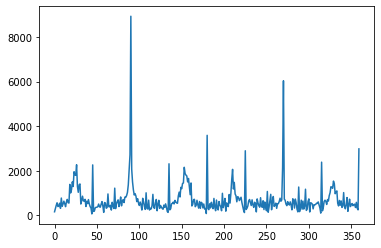

In [3]:
#este es el histogramas que use para sacar los angulos
hist1,bins1 = np.histogram(angle,360,[-180,180])
plt.plot(hist1)
plt.show()

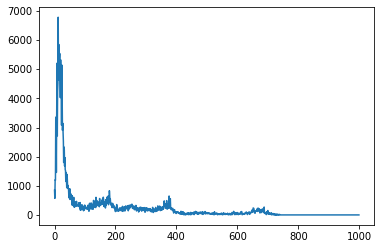

In [4]:
#este es el histo que hice para ver como distribuian las magnitudes
hist1,bins1 = np.histogram(mag,1000,[0,1000])
plt.plot(hist1)
plt.show()
